## EDA Data

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

In [ ]:
# Add my parent directory to path variables
from pathlib import Path

current_location = Path(os.path.abspath('')).parent.resolve()
# print(current_location)
# sys.path.append(str(current_location))

In [3]:
data_dir = os.path.join(current_location, "data")
ingest_dir = os.path.join(data_dir, "ingest")
enrich_dir = os.path.join(data_dir, "enrich")

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import imageio
from matplotlib.colors import Normalize
from matplotlib import cm

import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


## 1. Global Boundary

(244, 2)
EPSG:4326


,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."


<Axes: >

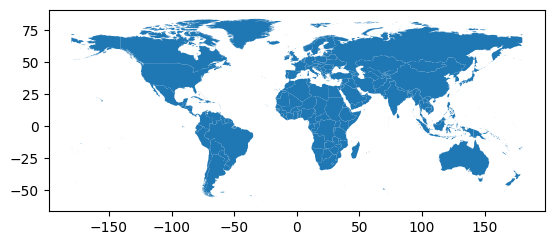

In [103]:
world_map_fname = os.path.join(ingest_dir, "world_population/World_Map.shp")
world_geo_df = gpd.read_file(world_map_fname)

# Dictionary of replacements for cleaning country names
country_replacements = {
    'Burma': 'Myanmar',
    'Brunei Darussalam': 'Brunei',
    'Congo': 'Republic of the Congo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Falkland Islands (Malvinas)': 'Falkland Islands',
    'Micronesia, Federated States of': 'Micronesia',
    'Iran (Islamic Republic of)': 'Iran',
    "Cote d'Ivoire": "Ivory Coast",
    "Korea, Democratic People's Republic of": 'North Korea',
    'Korea, Republic of': 'South Korea',
    "Lao People's Democratic Republic": 'Laos',
    'Libyan Arab Jamahiriya': 'Libya',
    'The former Yugoslav Republic of Macedonia': 'North Macedonia',
    'Åland Islands': 'Aland Islands',
    'Norfolk Island': 'Norfolk Islands',
    'Cocos (Keeling) Islands': 'Cocos Islands',
    'Bouvet Island': 'Bouvet Islands',
    'French Southern and Antarctic Lands': 'French Southern Territories',
    'Heard Island and McDonald Islands': 'Heard and McDonald Islands',
    'British Indian Ocean Territory': 'British Indian Ocean Territories',
    'Christmas Island': 'Christmas Islands',
    'United States Minor Outlying Islands': 'US Minor Outlying Islands',
    'Republic of Moldova': 'Moldova',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Viet Nam': 'Vietnam',
    'Wallis and Futuna Islands': 'Wallis and Futuna',
    'Swaziland': 'Eswatini',
    'Netherlands Antilles': 'Curacao',  # Assuming replacement since Antilles is dissolved
    'Pitcairn Islands': 'Pitcairn',
    'Saint Helena': 'Saint Helena, Ascension and Tristan da Cunha',
    'Holy See (Vatican City)': 'Vatican City',
    'Svalbard': 'Svalbard and Jan Mayen',
    'South Georgia South Sandwich Islands': 'South Georgia and the South Sandwich Islands'
}

# Replace values in the 'Country/Territory' column of population_df
world_geo_df['NAME'] = world_geo_df['NAME'].replace(country_replacements)

# Drop some countries
countries_to_drop = ["Tokelau"]
world_geo_df = world_geo_df[~world_geo_df['NAME'].isin(countries_to_drop)]


print(world_geo_df.shape)
print(world_geo_df.crs)
display(world_geo_df.head(2))
world_geo_df.plot()

## 2. CSV Population Data 

In [104]:
data_fname = os.path.join(ingest_dir, "world_population/world_population.csv")
population_df = pd.read_csv(data_fname)

print(population_df.shape)
population_df.head()


(234, 17)


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [106]:
display(population_df[population_df["Country/Territory"] == "North Korea"])

display(world_geo_df[world_geo_df["NAME"] == "North Korea"])

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
151,56,PRK,North Korea,Pyongyang,Asia,26069416,25867467,25258015,24686435,23367059,20799523,17973650,14996879,120538,216.2755,1.0038,0.33


,NAME,geometry
93,North Korea,"MULTIPOLYGON (((124.8461 39.49722, 124.83998 3..."


## 3. Merge Datasets

,NAME,geometry,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,score
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.0,100


(231, 20)


<Axes: >

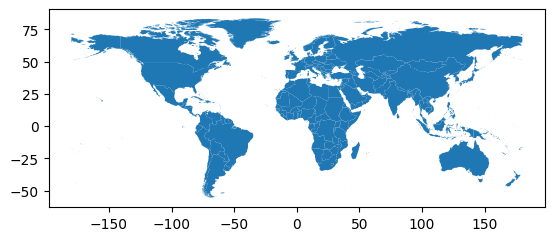

In [ ]:
# Function to apply fuzzy matching and include all columns from both DataFrames
def fuzzy_merge(df1, df2, key1, key2, threshold=91, score_col='score'):
    matched_rows = []
    
    for i, row in df1.iterrows():
        name = row[key1]
        match_result = process.extractOne(name, df2[key2], scorer=fuzz.token_sort_ratio)
        
        if match_result:
            match, score = match_result[0], match_result[1]
            
            if score >= threshold:
                if score != 100:
                    print(f"name: {name}. match: {match}. score: {score}")

                # Extract matched row from df2 and combine with row from df1
                df2_row = df2[df2[key2] == match].iloc[0].to_dict()
                combined_row = {**row.to_dict(), **df2_row, score_col: score}
                matched_rows.append(combined_row)

    # Convert matched rows to a DataFrame
    df = pd.DataFrame(matched_rows)
    gpd_df = gpd.GeoDataFrame(df, geometry="geometry", crs=df1.crs)
    return gpd_df

# Perform fuzzy merge
merged_df = fuzzy_merge(world_geo_df, population_df, 'NAME', 'Country/Territory')

# Display the results
display(merged_df.head(1))
print(merged_df.shape)
merged_df.plot()


<Axes: >

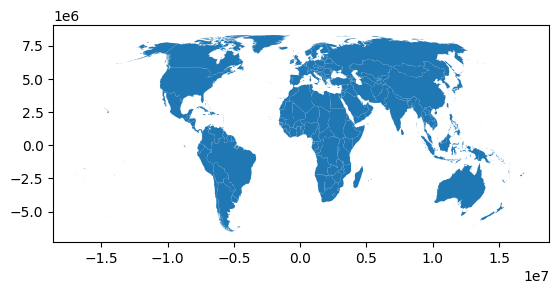

In [172]:
merged_df.to_crs("EPSG:8857").plot()

<Axes: >

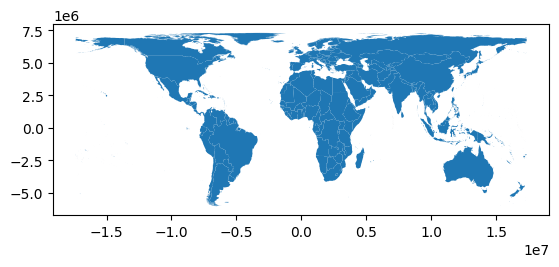

In [ ]:
merged_df.to_crs("ESRI:54017").plot()

In [ ]:
print(merged_df.shape, world_geo_df.shape)
# merged_df[merged_df["Continent"] == "Africa"].plot()

(231, 20) (244, 2)


In [111]:
skipped_df = world_geo_df[~world_geo_df["NAME"].isin(population_df["Country/Territory"])]
skipped_df.NAME.values

array(['Aland Islands', 'Norfolk Islands', 'Cocos Islands',
       'Bouvet Islands', 'French Southern Territories',
       'Heard and McDonald Islands', 'British Indian Ocean Territories',
       'Christmas Islands', 'US Minor Outlying Islands', 'Pitcairn',
       'Saint Helena, Ascension and Tristan da Cunha',
       'Svalbard and Jan Mayen',
       'South Georgia and the South Sandwich Islands'], dtype=object)

In [112]:
## Clean Up
merged_df = merged_df.rename(columns={"NAME": "country"}).drop(columns=['Country/Territory', 'score', 'Capital'], errors="ignore")
merged_df.head(3)

,country,geometry,Rank,CCA3,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",201,ATG,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",34,DZA,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",91,AZE,Asia,10358074,10284951,9863480,9237202,8190337,7427836,6383060,5425317,86600,119.6082,1.0044,0.13


# 4. Fit regression model too years and predict to 2050

In [ ]:
country_population_df = merged_df.copy()
country_population_df.to_csv(os.path.join(enrich_dir, "country_population_cleaned_df.csv"))

country_population_df.shape

(231, 17)

In [183]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def model_population(country_population_df, use_poly=True):
    # Define the years and corresponding column names
    years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]
    population_columns = [f"{year} Population" for year in years]

    # Initialize lists to store results
    r_squared_list = []
    predictions_list = []

    # Loop over each country
    for idx, row in country_population_df.iterrows():
        country_name = row['country']
        
        # Extract the population data for each year
        populations = row[population_columns].astype(int).values
        x = np.array(years)  # Years as the independent variable
        y = np.array(populations)  # Population as the dependent variable

        if use_poly:
            # Fit a 3rd degree polynomial model
            coeffs = np.polyfit(x, y, 3)
            model = np.poly1d(coeffs)

            # Calculate R-squared score
            y_pred = model(x)
            ss_res = np.sum((y - y_pred) ** 2)
            ss_tot = np.sum((y - np.mean(y)) ** 2)
            r_squared = 1 - (ss_res / ss_tot)
        
        else:
            # Fit an exponential growth model
            def exponential_growth(t, P0, r):
                return P0 * np.exp(r * t)

            # Convert years to time since the start year (for exponential fitting)
            t = x - x[0]

            # Fit the model to data
            popt, _ = curve_fit(exponential_growth, t, y, p0=[y[0], 0.03])
            P0, r = popt
            model = lambda t: P0 * np.exp(r * (t - x[0]))

            # Calculate R-squared score
            y_pred = model(x)
            ss_res = np.sum((y - y_pred) ** 2)
            ss_tot = np.sum((y - np.mean(y)) ** 2)
            r_squared = 1 - (ss_res / ss_tot)

        # Append R-squared result for this country
        r_squared_list.append({'country': country_name, 'R_squared': r_squared})

        # Make predictions for 2023 to 2050 and store in the correct format
        future_years = np.arange(2023, 2051)
        predictions = {f"{year} Population": model(year) for year in future_years}
        predictions['country'] = country_name
        predictions_list.append(predictions)

    # Convert R-squared results and predictions into DataFrames
    r_squared_df = pd.DataFrame(r_squared_list).merge(country_population_df[["country", "geometry"]], how="left")
    predictions_df = pd.DataFrame(predictions_list).merge(country_population_df[["country", "geometry"]], how="left")

    # Display the results
    print("R-squared DataFrame:")
    print(r_squared_df["R_squared"].describe())

    print("\nPredictions DataFrame:")
    print(predictions_df.head(1))

    return r_squared_df, predictions_df

In [ ]:
r_squared_df, predictions_df = model_population(country_population_df, use_poly=True)  # For exponential model

R-squared DataFrame:
count    231.000000
mean       0.984742
std        0.030886
min        0.809086
25%        0.988192
50%        0.997691
75%        0.999515
max        0.999992
Name: R_squared, dtype: float64

Predictions DataFrame:
   2023 Population  2024 Population  2025 Population  2026 Population  \
0     94569.128228     94981.271218      95330.06085      95612.32091   

   2027 Population  2028 Population  2029 Population  2030 Population  \
0     95824.875178     95964.547451     96028.161504     96012.541129   

   2031 Population  2032 Population  ...  2043 Population  2044 Population  \
0     95914.510109     95730.892232  ...     87153.965734     85695.560862   

   2045 Population  2046 Population  2047 Population  2048 Population  \
0     84110.278349     82394.941982     80546.375544     78561.402825   

   2049 Population  2050 Population              country  \
0     76436.847605     74169.533677  Antigua and Barbuda   

                                            

In [233]:
merged_w_preds_df = merged_df.merge(predictions_df, on=['geometry', 'country'])
merged_w_preds_df.head()

,country,geometry,Rank,CCA3,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,2041 Population,2042 Population,2043 Population,2044 Population,2045 Population,2046 Population,2047 Population,2048 Population,2049 Population,2050 Population
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",201,ATG,North America,93763,92664,89941,85695,75055,...,8.970285e+04,8.848867e+04,8.715397e+04,8.569556e+04,8.411028e+04,8.239494e+04,8.054638e+04,7.856140e+04,7.643685e+04,7.416953e+04
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",34,DZA,Africa,44903225,43451666,39543154,35856344,30774621,...,6.309224e+07,6.427090e+07,6.547466e+07,6.670400e+07,6.795941e+07,6.924138e+07,7.055037e+07,7.188688e+07,7.325139e+07,7.464437e+07
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",91,AZE,Asia,10358074,10284951,9863480,9237202,8190337,...,1.234053e+07,1.244278e+07,1.254528e+07,1.264801e+07,1.275100e+07,1.285424e+07,1.295774e+07,1.306150e+07,1.316553e+07,1.326983e+07
3,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1...",138,ALB,Europe,2842321,2866849,2882481,2913399,3182021,...,3.645202e+06,3.740867e+06,3.843186e+06,3.952344e+06,4.068528e+06,4.191923e+06,4.322714e+06,4.461088e+06,4.607231e+06,4.761329e+06
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",140,ARM,Asia,2780469,2805608,2878595,2946293,3168523,...,3.782040e+06,3.900781e+06,4.027749e+06,4.163167e+06,4.307259e+06,4.460248e+06,4.622357e+06,4.793808e+06,4.974825e+06,5.165631e+06


## 5. Create Population Growth Gif

/var/folders/4s/csm7xcxs2p75g582c25tbkkr0000gn/T/ipykernel_23225/3425301229.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("YlOrRd", 256)  # Red-Yellow-Green reversed to get Green-to-Blue
/var/folders/4s/csm7xcxs2p75g582c25tbkkr0000gn/T/ipykernel_23225/3425301229.py:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


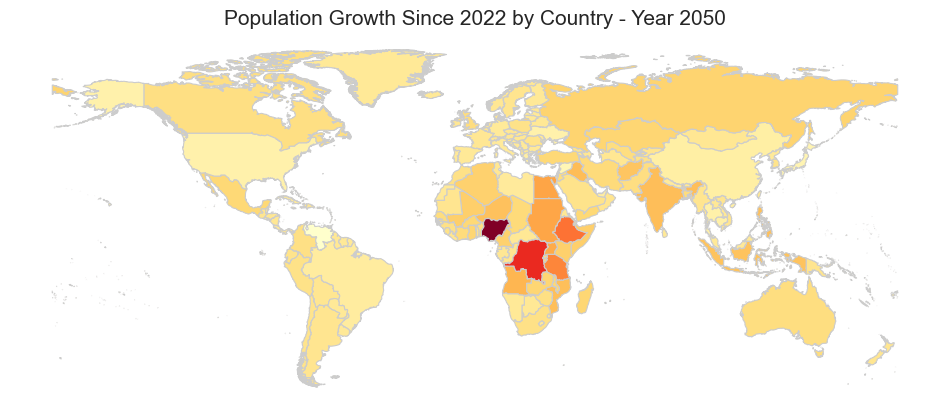

In [ ]:
# Define color scale from green to blue
cmap = cm.get_cmap("YlOrRd", 256)  # Red-Yellow-Green reversed to get Green-to-Blue
# cmap = cmap.reversed()

# Define years range
historical_years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]
future_years = list(range(2023, 2051))
all_years = historical_years + future_years
output_files = []
# Convert year list to column names in the format "Year Population"
year_base_int = 2022
all_years = [y for y in all_years if y >= year_base_int]
all_year_columns = [f"{year} Population" for year in all_years]
base_year_col = f'{year_base_int} Population'


# Normalize population growth for color mapping
growth_min = (merged_w_preds_df[all_year_columns].sub(merged_w_preds_df[base_year_col], axis=0)).min().min()
growth_max = (merged_w_preds_df[all_year_columns].sub(merged_w_preds_df[base_year_col], axis=0)).max().max()
norm = Normalize(vmin=growth_min, vmax=growth_max)

# Set up plot boundaries
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Generate map for each year
for year in all_years:
    # Create the column name for the current year
    year_column = f"{year} Population"
    
    # Ensure this column exists in the DataFrame
    if year_column not in merged_w_preds_df.columns:
        continue
    
    # Calculate growth from 1970 for the current year
    merged_w_preds_df['population_growth'] = merged_w_preds_df[year_column] - merged_w_preds_df[base_year_col]
    
    # Plot the map with color mapped to population growth
    ax.clear()  # Clear the axis for the new frame
    merged_w_preds_df.plot(column='population_growth', cmap=cmap, norm=norm, ax=ax, linewidth=0.8, edgecolor='0.8')

    # Set the title and color bar
    ax.set_title(f"Population Growth Since {year_base_int} by Country - Year {year}", fontsize=15)
    ax.set_axis_off()

    # Save the frame as a temporary file
    output_file = os.path.join(data_dir, f"output_images/temp_map_{year}.png")
    plt.savefig(output_file, format='png', dpi=100, bbox_inches='tight')
    output_files.append(output_file)

# Create the GIF
with imageio.get_writer("population_change_over_time_np_poly.gif", mode="I", fps=2) as writer:
    for filename in output_files:
        image = imageio.imread(filename)
        writer.append_data(image)


# Clean up temporary files
for filename in output_files:
    os.remove(filename)

## 6. Create Population Growth Bar chart

### Aggregate Continent Sums

In [197]:
# Assuming merged_w_preds_df has been defined and contains population data
# Group data by continent and calculate the sum of population for 2022 and 2050
population_by_continent = merged_w_preds_df.groupby("Continent")[["2022 Population", "2050 Population"]].sum()
display(population_by_continent)

# Calculate the population growth from 2022 to 2050
population_by_continent["Growth 2022-2050"] = population_by_continent["2050 Population"] - population_by_continent["2022 Population"]
population_by_continent["Growth 2022-2050"].astype(float)

,2022 Population,2050 Population
Continent,,
Africa,1415817768,2.760633e+09
Asia,4721383274,5.090375e+09
Europe,743147538,8.179085e+08
North America,600251961,6.353087e+08
Oceania,45036683,7.166058e+07
South America,436816608,4.437039e+08


Continent
Africa           1.344816e+09
Asia             3.689916e+08
Europe           7.476094e+07
North America    3.505679e+07
Oceania          2.662390e+07
South America    6.887310e+06
Name: Growth 2022-2050, dtype: float64

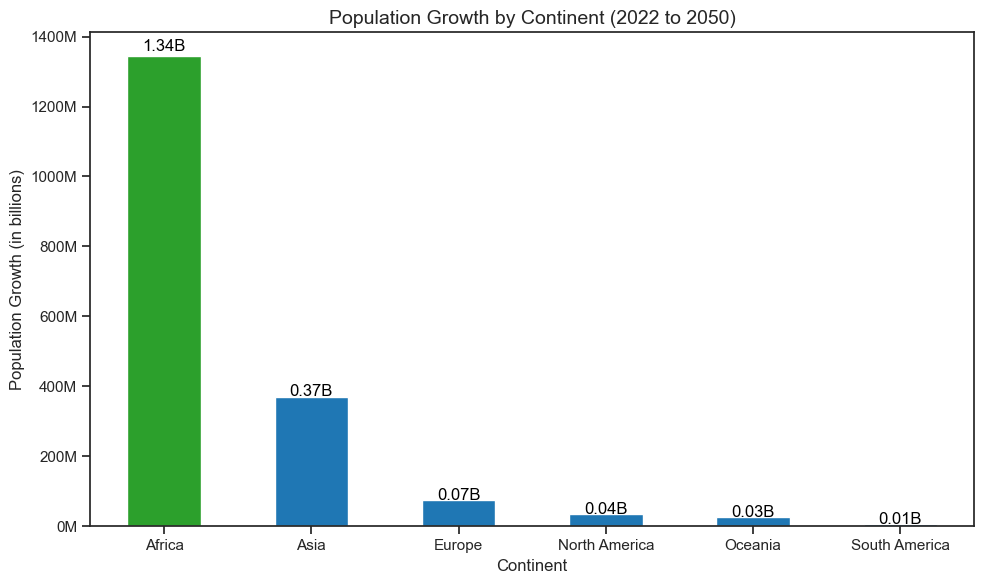

In [221]:
import seaborn as sns

# Apply seaborn style
sns.set(style="ticks")
# plt.style.use('default')


# Group data by continent and calculate the sum of population for 2022 and 2050
population_by_continent = merged_w_preds_df.groupby("Continent")[["2022 Population", "2050 Population"]].sum()

# Calculate the population growth from 2022 to 2050
population_by_continent["Growth 2022-2050"] = population_by_continent["2050 Population"] - population_by_continent["2022 Population"]

# Plotting the population growth
fig, ax = plt.subplots(figsize=(10, 6))

# Highlighting Africa
highlighted_color = 'tab:green'
other_color = 'tab:blue'

# Color all bars as "other" color, then specifically highlight Africa
colors = [highlighted_color if continent == "Africa" else other_color for continent in population_by_continent.index]

# Bar plot of the population growth by continent
population_by_continent["Growth 2022-2050"].plot(kind="bar", color=colors, ax=ax)

# Adding titles and labels
ax.set_title("Population Growth by Continent (2022 to 2050)", fontsize=14)
ax.set_xlabel("Continent")
ax.set_ylabel("Population Growth (in billions)")

# Format y-axis labels to avoid scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1e6)}M'))

# Rotate x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")


# Adding growth values above each bar
for i, (continent, growth) in enumerate(population_by_continent["Growth 2022-2050"].items()):
    ax.text(i, growth + 0.01 * growth, f"{growth / 1e9:.2f}B", ha="center", color="black", fontsize=12)

plt.tight_layout()
fname_out = os.path.join(data_dir, f"output_images/continental_growth_projections_2022_2050.png")
plt.savefig(fname_out, dpi=400)
plt.show()